In [24]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report


In [2]:
pd

<module 'pandas' from '/home/thejoker/newanaconda/lib/python3.11/site-packages/pandas/__init__.py'>

In [28]:
# Load data
train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")
test = pd.read_csv("test.csv")
# Separate features and target
X_train = train.drop(columns=['diabetes'])
y_train = train['diabetes']
X_val = val.drop(columns=['diabetes'])
y_val = val['diabetes']
X_test = test.drop(columns = ['diabetes'])
y_test = test['diabetes']

In [30]:

# Hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],                # Regularization type
    'solver': ['liblinear', 'saga'] ,        # Solvers that support L1/L2
    'class_weight': ['balanced'],                # handles imbalance
    'max_iter': [500, 1000]
}


In [31]:
# Grid search with 5-fold CV
grid_search = GridSearchCV(
    LogisticRegression(),
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)


In [32]:

# Fit on training data only
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/thejoker/newanaconda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/thejoker/newanaconda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/thejoker/newanaconda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/thejoker/newanaconda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/thejoker/newanaconda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/thejoker/newanaconda/lib/python3.11/sit

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'max_iter': [500, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1', verbose=1)

In [38]:
bestModel = grid_search.best_estimator_

In [34]:
grid_search.best_score_

0.5770025402240432

In [39]:
#on test set
y_pred_test = bestModel.predict(X_test)

In [40]:

# Calculate metrics
cm = confusion_matrix(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print evaluation results
print("\nBest Hyperparameters:", grid_search.best_params_)
print("Confusion Matrix:\n", cm)
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test, digits=3))


Best Hyperparameters: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Confusion Matrix:
 [[15445  2089]
 [  196  1500]]
Precision: 0.418
Recall:    0.884
F1 Score:  0.568

Classification Report:
               precision    recall  f1-score   support

           0      0.987     0.881     0.931     17534
           1      0.418     0.884     0.568      1696

    accuracy                          0.881     19230
   macro avg      0.703     0.883     0.749     19230
weighted avg      0.937     0.881     0.899     19230



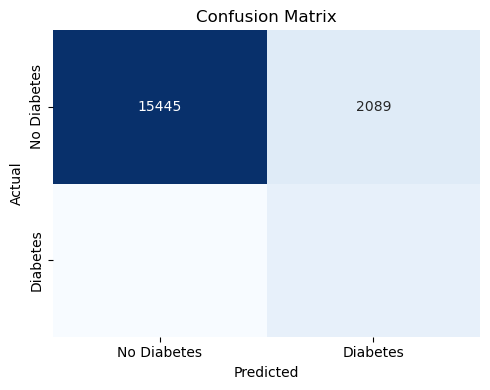

/home/thejoker/newanaconda/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


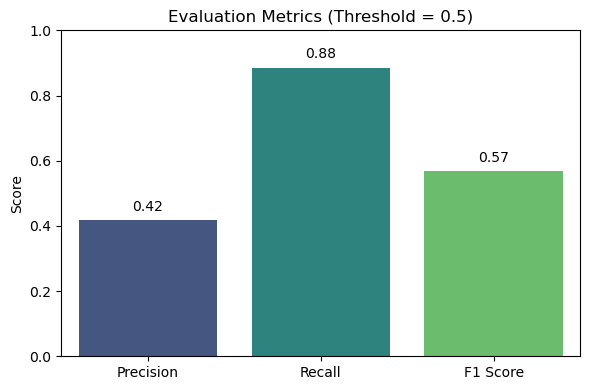

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# 1. Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# 2. Bar Chart of Precision, Recall, F1
metrics = [precision, recall, f1]
labels = ['Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=metrics, palette='viridis')
plt.ylim(0, 1)
for i, val in enumerate(metrics):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', va='bottom')
plt.title('Evaluation Metrics (Threshold = 0.5)')
plt.ylabel('Score')
plt.tight_layout()
plt.show()
